https://www.youtube.com/watch?v=m2AyljDHYes

https://www.kaggle.com/yugpuroosh/autoencoder-made-easy/edit

In [18]:
import numpy as np 
import pandas as pd
import os 
import matplotlib.pyplot as plt 
import tensorflow as tf  

from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.models import Model
from keras.preprocessing import image

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
tf.config.list_physical_devices('GPU')

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 686351320891200465
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5906169856
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8620776791608814654
physical_device_desc: "device: 0, name: GeForce RTX 2070 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [19]:
cat_train_path = "/home/pratham/study/input_data/washer/da_opencv/pos/"

cat_train = []
for filename in os.listdir(cat_train_path):
    if filename.endswith(".jpg"):
        img = image.load_img(cat_train_path+filename, target_size=(256, 256))
        cat_train.append(image.img_to_array(img))
cat_train = np.array(cat_train)


In [20]:
from sklearn.model_selection import train_test_split
cat_train, cat_test = train_test_split(cat_train, test_size=0.20, random_state=0)

In [21]:
print("cat_train", cat_train.shape)
print("cat_test", cat_test.shape)

cat_train (120, 256, 256, 3)
cat_test (30, 256, 256, 3)


# *Visualize the cats*

In [22]:
def show_cat_data(X, n=10, title=""):
    plt.figure(figsize=(15,5))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(image.array_to_img(X[i]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)
def show_data(X, n=10, height=28, width=28, title=""):
    plt.figure(figsize=(10, 3))
    for i in range (n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(X[i].reshape((height, width)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

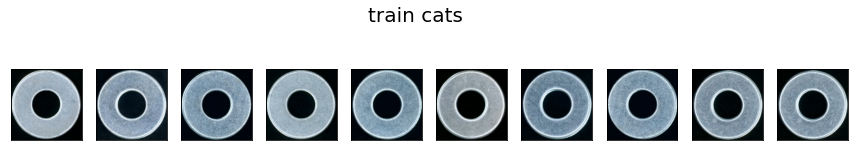

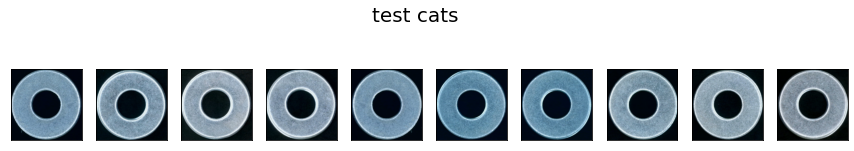

In [23]:
show_cat_data(cat_train, title="train cats")
show_cat_data(cat_test, title="test cats")

# *Build the cat Autoencoder*

In [24]:
input_layer = Input(shape=(256,256,3), name = "INPUT")
x = Conv2D(16, (3,3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2,2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

code_layer = MaxPooling2D((2, 2), name = "CODE")(x)

x = Conv2DTranspose(8, (3,3), activation = 'relu', padding='same')(code_layer)
x = UpSampling2D((2,2))(x)
x = Conv2DTranspose(8, (3,3), activation = 'relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2DTranspose(8, (3,3), activation = 'relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2DTranspose(16, (3,3), activation = 'relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
outpput_layer = Conv2D(3, (3,3), padding='same', name='OUTPUT')(x)

cat_AE = Model(input_layer, outpput_layer)

In [25]:
cat_AE.compile(optimizer='adam', loss='mse')
cat_AE.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 8)       1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 8)         584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 8)         0     

# *Train the cat Autoencoder*

In [26]:
cat_AE.fit(cat_train, cat_train,
            epochs=300,
            batch_size = 32,
            shuffle=True,
            validation_data=(cat_test, cat_test))

Epoch 1/300
4/4 [==============================] - 14s 546ms/step - loss: 17892.0895 - val_loss: 16512.6895
Epoch 2/300
4/4 [==============================] - 0s 71ms/step - loss: 17710.5746 - val_loss: 16454.0879
Epoch 3/300
4/4 [==============================] - 0s 68ms/step - loss: 17608.2496 - val_loss: 16300.7793
Epoch 4/300
4/4 [==============================] - 0s 69ms/step - loss: 17409.4477 - val_loss: 15574.8086
Epoch 5/300
4/4 [==============================] - 0s 71ms/step - loss: 16052.5682 - val_loss: 12435.4414
Epoch 6/300
4/4 [==============================] - 0s 72ms/step - loss: 11857.5402 - val_loss: 5970.3228
Epoch 7/300
4/4 [==============================] - 0s 70ms/step - loss: 6638.6114 - val_loss: 4643.1440
Epoch 8/300
4/4 [==============================] - 0s 72ms/step - loss: 4546.4599 - val_loss: 4190.7188
Epoch 9/300
4/4 [==============================] - 0s 73ms/step - loss: 4124.8518 - val_loss: 3017.7876
Epoch 10/300
4/4 [==============================] -

# *Save model*

In [27]:
cat_AE.save('cat_AE_03.h5')

# *Make a model to get the encoded representation (i.e. intermediate layer output) for a given cat image.*

In [28]:
get_encoded_data = Model(inputs=cat_AE.input, outputs = cat_AE.get_layer("CODE").output)

# *Get the encoded cats*

In [29]:
encoded_cat = get_encoded_data.predict(cat_test)
encoded_cat.shape

(30, 16, 16, 8)

In [30]:
encoded_cat = encoded_cat.reshape((len(cat_test), 16*16*8))
encoded_cat.shape

(30, 2048)

# *Get the reconstructed cats*

In [31]:
reconstructed_cats = cat_AE.predict(cat_test)

In [32]:
reconstructed_cats.shape

(30, 256, 256, 3)

# *Visialize the results on test set*

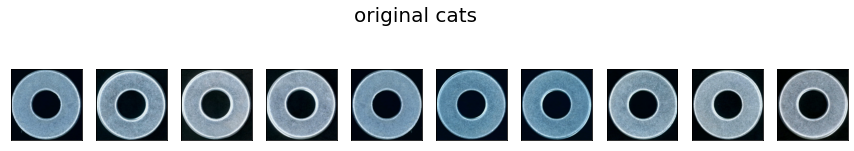

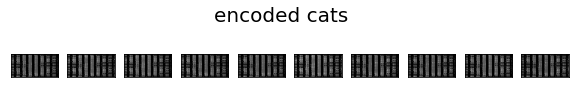

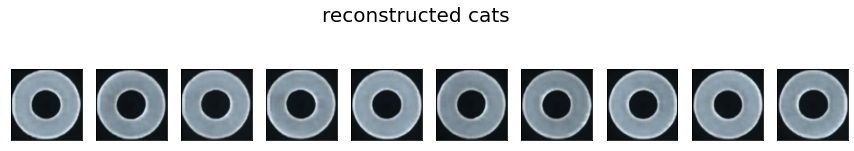

In [33]:
show_cat_data(cat_test, title="original cats")
show_data(encoded_cat, height=32, width=64, title="encoded cats")
show_cat_data(reconstructed_cats, title="reconstructed cats")

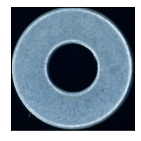

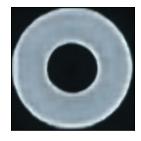

In [34]:
pred = cat_AE.predict(cat_test[0].reshape(-1, 256, 256, 3))
show_cat_data(cat_test, n =1)
show_cat_data(pred, n=1)

In [35]:
from sklearn import metrics
score1 = np.sqrt(metrics.mean_squared_error(pred.flatten(), cat_test[0].reshape(-1, 256, 256, 3).flatten()))
print(f"Score 1 Good Score (RMSE): {score1}")

Score 1 Good Score (RMSE): 16.169687271118164


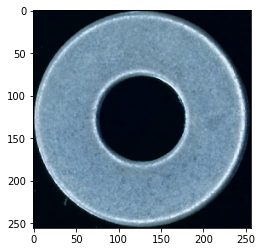

In [36]:
plt.imshow(image.array_to_img(cat_test[0]))

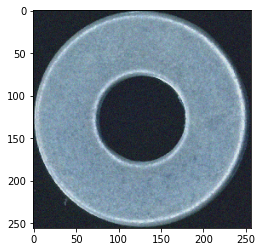

In [37]:
img = cat_test[0]
gaussian = np.random.normal(10, 10, (img.shape[0],img.shape[1], img.shape[2])) 
noisy_image = img + gaussian
plt.imshow(image.array_to_img(noisy_image))

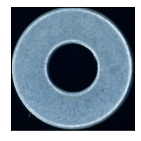

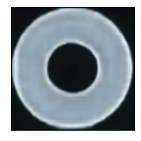

In [38]:
pred = cat_AE.predict(noisy_image.reshape(-1, 256, 256, 3))
show_cat_data(cat_test, n =1)
show_cat_data(pred, n=1)

In [39]:
from sklearn import metrics
score2 = np.sqrt(metrics.mean_squared_error(pred.flatten(), cat_test[0].reshape(-1, 256, 256, 3).flatten()))
print(f"Score 2 With 10 Noise Score (RMSE): {score2}")

Score 2 With 10 Noise Score (RMSE): 17.940837860107422


In [40]:
neg_path = "/home/pratham/study/input_data/washer/da_opencv/neg/"

neg = []
for filename in os.listdir(neg_path):
    if filename.endswith(".jpg"):
        img = image.load_img(neg_path+filename, target_size=(256, 256))
        neg.append(image.img_to_array(img))
neg = np.array(neg)

In [41]:
neg.shape

(155, 256, 256, 3)

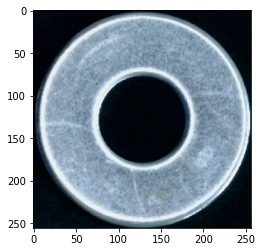

In [42]:
noisy_image = neg[0]
plt.imshow(image.array_to_img(noisy_image))

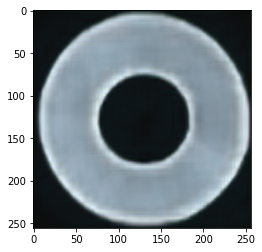

In [43]:
pred = cat_AE.predict(noisy_image.reshape(-1, 256, 256, 3))
plt.imshow(image.array_to_img(neg[0]))
plt.imshow(image.array_to_img(pred[0]))

In [44]:
from sklearn import metrics
score3 = np.sqrt(metrics.mean_squared_error(pred.flatten(), neg[0].reshape(-1, 256, 256, 3).flatten()))
print(f"Score 2 With 30 Noise Score (RMSE): {score3}")

Score 2 With 30 Noise Score (RMSE): 16.3029842376709


In [45]:
neg_path = "/home/pratham/study/input_data/washer/washer_ng/kizu/"
from sklearn import metrics
neg1 = []
for filename in os.listdir(neg_path):
    if filename.endswith(".jpg"):
        img = image.load_img(neg_path+filename, target_size=(256, 256))
        img  = image.img_to_array(img)
        pred = cat_AE.predict(img.reshape(-1, 256, 256, 3))
        score3 = np.sqrt(metrics.mean_squared_error(pred.flatten(), img.reshape(-1, 256, 256, 3).flatten()))
        print(" {},{}".format(filename,score3))
        neg1.append(img)
neg1 = np.array(neg)

 WIN_20200505_11_01_59_Pro.jpg,17.091798782348633
 WIN_20200505_10_57_27_Pro.jpg,18.44072914123535
 WIN_20200505_11_12_33_Pro.jpg,23.512577056884766
 WIN_20200505_12_48_49_Pro.jpg,16.078914642333984
 WIN_20200505_10_56_18_Pro.jpg,12.906988143920898
 WIN_20200505_12_21_54_Pro.jpg,17.75782012939453
 WIN_20200505_13_11_32_Pro.jpg,18.63068962097168
 WIN_20200505_11_05_59_Pro.jpg,17.324331283569336
 WIN_20200505_12_31_58_Pro.jpg,15.670758247375488
 WIN_20200505_10_51_54_Pro.jpg,15.15601921081543
 WIN_20200505_12_17_44_Pro.jpg,18.273956298828125
 WIN_20200505_12_18_15_Pro.jpg,16.183929443359375
 WIN_20200505_11_58_55_Pro.jpg,16.605756759643555
 WIN_20200505_10_55_33_Pro.jpg,15.874442100524902
 WIN_20200505_13_07_32_Pro.jpg,14.954864501953125
 WIN_20200505_11_51_41_Pro.jpg,16.03359603881836
 WIN_20200505_13_12_54_Pro.jpg,19.050811767578125
 WIN_20200505_11_01_36_Pro.jpg,16.15976333618164
 WIN_20200505_11_19_07_Pro.jpg,16.660964965820312
 WIN_20200505_11_52_06_Pro.jpg,16.00961685180664
 WIN_20

In [ ]:
for per epoch 
validation loss and Training loss 
Use Tensorboard

Output
Parse by MSE

Threshold set
1.avg
2.


Model Explainabilty
1. Heat Map 